Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Importing Dataset

In [2]:
dataset = pd.read_csv('Data.csv')

In [3]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
x = dataset.drop('Class', axis = 1)
y = dataset['Class']

Splitting dataset into Train/Test set

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Feature Scaling dataset

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training dataset with K Nearest Neighbors model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predictions

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
results = pd.DataFrame({'Test set': np.array(y_test), 'Predictions': np.array(y_pred)})

In [11]:
results

,Test set,Predictions
0,2,2
1,2,2
2,4,4
3,2,2
4,4,4
...,...,...
132,4,2
133,2,2
134,4,2
135,2,2


Metrics

In [12]:
print(confusion_matrix(y_test, y_pred))

[[94  3]
 [ 4 36]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.96      0.97      0.96        97
           4       0.92      0.90      0.91        40

    accuracy                           0.95       137
   macro avg       0.94      0.93      0.94       137
weighted avg       0.95      0.95      0.95       137



Finding optimal number of K by using Elbow Method

In [14]:
error_rate = []
for i in range(1, 40):
  classifier_i = KNeighborsClassifier(n_neighbors= i, metric= 'minkowski', p = 2)
  classifier_i.fit(x_train, y_train)
  y_pred_i = classifier_i.predict(x_test)
  error_rate.append(np.mean(y_pred_i != y_test))

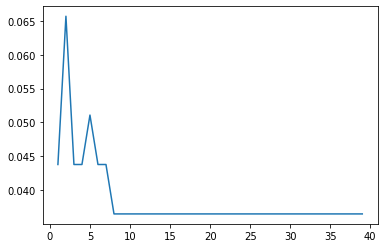

In [15]:
plt.plot(range(1, 40), error_rate)

K = 8 (from Elbow Method)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
print(confusion_matrix(y_test, y_pred))

[[95  2]
 [ 3 37]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97        97
           4       0.95      0.93      0.94        40

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.96       137
weighted avg       0.96      0.96      0.96       137

